### DATA UPLOAD AND RENAMINGS

In [290]:
 !pip install pyreadstat

import pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import kstest, norm
from scipy.stats import zscore


%matplotlib inline


In [221]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Macbook/Dissertation/SPSS/industry.SAV"
data, meta = pyreadstat.read_sav(file_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,INTNR,dsk2,nace,Q002.1,Q002.2,fin_nace,TQ002.3o,Q003,Q003o,Q004,...,Q033.4,Q033.5,Q033.7,Q034,region,profit_before_tax2021,net_profit2021,avgWage,numInsured2,avgWage2
0,3305.0,2.0,23.0,2.0,32.0,32.0,"Aliuminio langai,fasadai.",1.0,NaN,1.0,...,0.0,0.0,2020.0,1.0,6.0,36551.0,30752.0,NaN,0.0,NaN
1,4023.0,1.0,27.0,2.0,32.0,32.0,Medicinininių elektroninių prietaisų gamyba,1.0,NaN,2.0,...,5.0,0.0,2017.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN
2,3.0,2.0,16.0,2.0,32.0,32.0,Malkos,8.0,15.0,4.0,...,0.0,0.0,2012.0,1.0,10.0,NaN,NaN,NaN,0.0,NaN
3,290.0,2.0,26.0,2.0,32.0,32.0,"medicininė įranga, inkubatoriai",8.0,10.0,3.0,...,4.0,0.0,2010.0,1.0,2.0,NaN,NaN,NaN,0.0,NaN
4,1767.0,2.0,25.0,2.0,32.0,32.0,Centrinio šildymo radiatorių ir katilų gamyba,1.0,NaN,1.0,...,3.0,NaN,2008.0,1.0,2.0,327308.0,273056.0,NaN,0.0,NaN


* The data collected is considering various aspects of industry and its digitalization and it contains 108 columns which not all of them required for analysis especially in the topic of digitalization extent of top performing manufacturing companies, thus columns that are not helpful with analysis will be dropped.
* Columns containing dependent variables(financial metrics) and independent variables(digital technologies adoption survey data questions) kept for analysis
---



In [222]:
#technology questions with adoption year dropped as it contained a lot of missing values and unnecessarily increased column numbers
columns_to_drop = [col for col in data.columns if col.startswith("TQ")]
df = data.drop(columns=columns_to_drop)
df.head()


,INTNR,dsk2,nace,Q002.1,Q002.2,fin_nace,Q003,Q003o,Q004,Q005,...,Q033.4,Q033.5,Q033.7,Q034,region,profit_before_tax2021,net_profit2021,avgWage,numInsured2,avgWage2
0,3305.0,2.0,23.0,2.0,32.0,32.0,1.0,NaN,1.0,1.0,...,0.0,0.0,2020.0,1.0,6.0,36551.0,30752.0,NaN,0.0,NaN
1,4023.0,1.0,27.0,2.0,32.0,32.0,1.0,NaN,2.0,1.0,...,5.0,0.0,2017.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN
2,3.0,2.0,16.0,2.0,32.0,32.0,8.0,15.0,4.0,1.0,...,0.0,0.0,2012.0,1.0,10.0,NaN,NaN,NaN,0.0,NaN
3,290.0,2.0,26.0,2.0,32.0,32.0,8.0,10.0,3.0,1.0,...,4.0,0.0,2010.0,1.0,2.0,NaN,NaN,NaN,0.0,NaN
4,1767.0,2.0,25.0,2.0,32.0,32.0,1.0,NaN,1.0,1.0,...,3.0,NaN,2008.0,1.0,2.0,327308.0,273056.0,NaN,0.0,NaN


In [223]:
# Columns containing dependent variables or financial metrics kept for further analysis
main_cols = [
    "fin_nace", "Q033.1", "Q033.2", "Q033.3", "Q033",
    "profit_before_tax2021", "net_profit2021"
]

# Columns containing digital technologies survey data or independent variables of this dataset kept for further analysis
question_cols = [f"Q{str(i).zfill(3)}.{j}" for i in range(18, 29) for j in range(1, 4)]
columns_to_keep = main_cols + question_cols
existing_cols = [col for col in columns_to_keep if col in df.columns]
df_cleaned = df[existing_cols].copy()


In [224]:
df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fin_nace               506 non-null    float64
 1   Q033.1                 495 non-null    float64
 2   Q033.2                 364 non-null    float64
 3   Q033.3                 398 non-null    float64
 4   Q033                   506 non-null    float64
 5   profit_before_tax2021  363 non-null    float64
 6   net_profit2021         363 non-null    float64
 7   Q018.1                 359 non-null    float64
 8   Q018.2                 392 non-null    float64
 9   Q018.3                 394 non-null    float64
 10  Q019.1                 355 non-null    float64
 11  Q019.2                 317 non-null    float64
 12  Q019.3                 364 non-null    float64
 13  Q020.1                 407 non-null    float64
 14  Q020.2                 387 non-null    float64
 15  Q020.3

,fin_nace,Q033.1,Q033.2,Q033.3,Q033,profit_before_tax2021,net_profit2021,Q018.1,Q018.2,Q018.3,...,Q025.3,Q026.1,Q026.2,Q026.3,Q027.1,Q027.2,Q027.3,Q028.1,Q028.2,Q028.3
0,32.0,1073924.0,3.0,3.0,16.0,36551.0,30752.0,2.0,4.0,4.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0
1,32.0,NaN,3.0,NaN,7.0,NaN,NaN,3.0,5.0,NaN,...,3.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN
2,32.0,900000.0,5.0,4.0,13.0,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,32.0,6500000.0,4.0,4.0,72.0,NaN,NaN,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN
4,32.0,3839360.0,5.0,2.0,46.0,327308.0,273056.0,1.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [225]:
df_renamed = df_cleaned.rename(columns={
    "fin_nace": "sector",
    "Q033.1": "annual_turnover",
    "Q033.2": "return_on_sales",
    "Q033.3": "exports_percent",
    "Q033": "num_employees",
    "profit_before_tax2021": "gross_profit",
    "net_profit2021": "net_profit",

    "Q018.1": "ERP production_planning_software",
    "Q018.2": "order_tracking_software",
    "Q018.3": "MES integrated_operations_software",

    "Q019.1": "industrial_robots_usage",
    "Q019.2": "collaborative_robots_usage",
    "Q019.3": "process_automation",

    "Q020.1": "cad_software_usage",
    "Q020.2": "cnc_equipment_usage",
    "Q020.3": "3d_printing_prototyping",

    "Q021.1": "shopfloor_tablet_use",
    "Q021.2": "interactive_production_instructions",
    "Q021.3": "paperless_production",

    "Q022.1": "inventory_tracking_raw_materials",
    "Q022.2": "automatic_ordering_solutions",
    "Q022.3": "inventory_tracking_finished_goods",

    "Q023.1": "work_center_data_collection",
    "Q023.2": "wip_tracking_rfid_barcode",
    "Q023.3": "downtime_data_collection",

    "Q024.1": "ai_quality_control",
    "Q024.2": "ai_demand_forecasting",
    "Q024.3": "ai_predictive_maintenance",

    "Q025.1": "simulation_root_cause_analysis",
    "Q025.2": "process_mining",
    "Q025.3": "simulation_schedule_prediction",

    "Q026.1": "ar_asset_identification",
    "Q026.2": "ar_training",
    "Q026.3": "ar_maintenance_management",

    "Q027.1": "automated_production_lines",
    "Q027.2": "autonomous_production_control",
    "Q027.3": "autonomous_data_analysis",

    "Q028.1": "info_sharing_with_suppliers",
    "Q028.2": "collaborative_planning_with_suppliers",
    "Q028.3": "system_integration_with_suppliers",
})

In [226]:
sector_names = {
    10.0: 'Manufacture of food products',
    11.0: 'Beverage production',
    12.0: 'Manufacture of tobacco products',
    13.0: 'Production of textile products',
    14.0: 'Garment sewing (production)',
    15.0: 'Manufacture of leather and leather products',
    16.0: 'Manufacture of wood and of products of wood and cork, except furniture, manufacture of articles of straw',
    17.0: 'Manufacture of paper and paper products',
    18.0: 'Printing and reproduction of recorded media',
    19.0: 'Manufacture of coke and refined petroleum products',
    20.0: 'Manufacture of chemicals and chemical products',
    21.0: 'Manufacture of basic pharmaceutical products and pharmaceutical preparations',
    22.0: 'Manufacture of rubber and plastic products',
    23.0: 'Manufacture of other non-metallic mineral products',
    24.0: 'Production of basic metals',
    25.0: 'Manufacture of fabricated metal products other than machinery and equipment',
    26.0: 'Manufacture of computer, electronic and optical products',
    27.0: 'Manufacture of electrical equipment',
    28.0: 'Manufacture of machinery and equipment not elsewhere classified',
    29.0: 'Manufacture of motor vehicles, trailers and semi-trailers',
    30.0: 'Manufacture of other vehicles and equipment',
    31.0: 'Furniture production',
    32.0: 'Other production',
    33.0: 'Repair and installation of machinery and equipment'
}

In [227]:
df_renamed["sector_name"] = df_renamed["sector"].map(sector_names)

In [228]:
df_renamed

,sector,annual_turnover,return_on_sales,exports_percent,num_employees,gross_profit,net_profit,ERP production_planning_software,order_tracking_software,MES integrated_operations_software,...,ar_asset_identification,ar_training,ar_maintenance_management,automated_production_lines,autonomous_production_control,autonomous_data_analysis,info_sharing_with_suppliers,collaborative_planning_with_suppliers,system_integration_with_suppliers,sector_name
0,32.0,1073924.0,3.0,3.0,16.0,36551.0,30752.0,2.0,4.0,4.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,Other production
1,32.0,NaN,3.0,NaN,7.0,NaN,NaN,3.0,5.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,Other production
2,32.0,900000.0,5.0,4.0,13.0,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Other production
3,32.0,6500000.0,4.0,4.0,72.0,NaN,NaN,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,Other production
4,32.0,3839360.0,5.0,2.0,46.0,327308.0,273056.0,1.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Other production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,11.0,1000000.0,1.0,1.0,7.0,NaN,NaN,2.0,4.0,2.0,...,1.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,3.0,Beverage production
502,16.0,815110.0,NaN,3.0,31.0,2215.0,2115.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,2.0,1.0,3.0,3.0,2.0,Manufacture of wood and of products of wood an...
503,13.0,2192224.0,2.0,3.0,61.0,148542.0,148542.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,4.0,4.0,4.0,3.0,3.0,Production of textile products
504,16.0,10964752.0,2.0,4.0,216.0,-190611.0,-190611.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,Manufacture of wood and of products of wood an...


In [229]:
df_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sector                                 506 non-null    float64
 1   annual_turnover                        495 non-null    float64
 2   return_on_sales                        364 non-null    float64
 3   exports_percent                        398 non-null    float64
 4   num_employees                          506 non-null    float64
 5   gross_profit                           363 non-null    float64
 6   net_profit                             363 non-null    float64
 7   ERP production_planning_software       359 non-null    float64
 8   order_tracking_software                392 non-null    float64
 9   MES integrated_operations_software     394 non-null    float64
 10  industrial_robots_usage                355 non-null    float64
 11  collab

In [230]:
df_renamed.describe(include='all')

,sector,annual_turnover,return_on_sales,exports_percent,num_employees,gross_profit,net_profit,ERP production_planning_software,order_tracking_software,MES integrated_operations_software,...,ar_asset_identification,ar_training,ar_maintenance_management,automated_production_lines,autonomous_production_control,autonomous_data_analysis,info_sharing_with_suppliers,collaborative_planning_with_suppliers,system_integration_with_suppliers,sector_name
count,506.000000,4.950000e+02,364.000000,398.000000,506.000000,3.630000e+02,3.630000e+02,359.000000,392.000000,394.000000,...,340.000000,349.000000,342.000000,353.000000,384.000000,387.000000,409.000000,388.000000,362.000000,506
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manufacture of fabricated metal products other...
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
mean,21.954545,1.462893e+07,2.972527,2.550251,55.519763,5.708836e+05,3.122132e+05,2.827298,3.301020,3.302030,...,2.008824,1.965616,1.885965,2.215297,2.848958,2.896641,2.933985,2.304124,2.138122,NaN
std,7.195702,1.936474e+08,1.254990,1.418211,118.324226,5.459431e+06,3.493004e+06,1.373423,1.385419,1.365756,...,0.951592,0.921623,0.829360,1.159983,1.305981,1.285497,1.355108,1.118454,0.960572,NaN
min,10.000000,1.043000e+03,1.000000,1.000000,1.000000,-3.329200e+07,-3.329200e+07,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,16.000000,4.248370e+05,2.000000,1.000000,11.000000,0.000000e+00,9.325000e+02,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN
50%,23.000000,1.006382e+06,3.000000,3.000000,20.000000,2.223100e+04,2.319200e+04,2.000000,4.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,NaN
75%,28.000000,3.849180e+06,4.000000,4.000000,49.000000,1.791910e+05,1.410270e+05,4.000000,5.000000,4.000000,...,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,NaN


#### identifying number of missing values per column

In [231]:
#number of missing values
df_renamed.isnull().sum()

,0
sector,0
annual_turnover,11
return_on_sales,142
exports_percent,108
num_employees,0
gross_profit,143
net_profit,143
ERP production_planning_software,147
order_tracking_software,114
MES integrated_operations_software,112


** As it can be seen from the amount of missing values analysing, the data and identifying top performing companies with Return on Sales, Export Percent,Gross and Net Profit would be causing a lot of missing information if dropped as they are unique information belongs to company and cannot be properly imputed for analysis. But Annual Turnover in return contains only a little missing values which dropping them wouldnt cause much loss in important data.

In [232]:
#percentage of missing values
missing_values = (df_renamed.isnull().mean() * 100).sort_values(ascending=False)
missing_values

,0
ai_demand_forecasting,37.549407
collaborative_robots_usage,37.351779
ai_predictive_maintenance,36.166008
simulation_root_cause_analysis,35.177866
ai_quality_control,34.387352
3d_printing_prototyping,33.794466
ar_asset_identification,32.806324
ar_maintenance_management,32.411067
simulation_schedule_prediction,32.015810
process_mining,31.225296


### Missing Value Handling

In [233]:
df_renamed["order_tracking_software"].unique()


array([ 4.,  5.,  1., nan,  2.,  3.])

In [234]:
digital_columns = [
    "ERP production_planning_software", "order_tracking_software", "MES integrated_operations_software",
    "industrial_robots_usage", "collaborative_robots_usage", "process_automation",
    "cad_software_usage", "cnc_equipment_usage", "3d_printing_prototyping",
    "shopfloor_tablet_use", "interactive_production_instructions", "paperless_production",
    "inventory_tracking_raw_materials", "automatic_ordering_solutions", "inventory_tracking_finished_goods",
    "work_center_data_collection", "wip_tracking_rfid_barcode", "downtime_data_collection",
    "ai_quality_control", "ai_demand_forecasting", "ai_predictive_maintenance",
    "simulation_root_cause_analysis", "process_mining", "simulation_schedule_prediction",
    "ar_asset_identification", "ar_training", "ar_maintenance_management",
    "automated_production_lines", "autonomous_production_control", "autonomous_data_analysis",
    "info_sharing_with_suppliers", "collaborative_planning_with_suppliers", "system_integration_with_suppliers"
]


* First identifying survey data columns and handling missing values in a way that could later be used analysis is important to reduce their affect on statistical analysis thats why missing NAN values filled with -1 for later ignoring them in analysis of created adjusted weighted scores. Now we have answers as the numbers in below array, which -1 means the technology and the question is not applicable or the question left unanswered by respondents

In [235]:
df_adjusted = df_renamed.copy()
df_adjusted[digital_columns] = df_adjusted[digital_columns].fillna(-1)

In [236]:
df_adjusted = df_adjusted.dropna(subset=['annual_turnover']) #missing values for annual turnover dropped

In [237]:
df_adjusted["order_tracking_software"].unique()


array([ 4.,  1.,  5., -1.,  2.,  3.])

In [238]:
remaining_missing_data = (df_adjusted.isna().mean() * 100).sort_values(ascending=False)
remaining_missing_data

,0
net_profit,27.070707
gross_profit,27.070707
return_on_sales,26.868687
exports_percent,20.202020
sector,0.000000
num_employees,0.000000
annual_turnover,0.000000
ERP production_planning_software,0.000000
order_tracking_software,0.000000
MES integrated_operations_software,0.000000


In [239]:
not_applicable_ratios = {}

for col in digital_columns:
    total = df_adjusted.shape[0]
    not_applicable = (df_adjusted[col] == -1).sum()
    percentage = round((not_applicable / total) * 100, 2)
    not_applicable_ratios[col] = percentage

not_applicable_df = pd.DataFrame.from_dict(not_applicable_ratios, orient='index', columns=['% Not Applicable'])
not_applicable_df = not_applicable_df.sort_values('% Not Applicable', ascending=False)
not_applicable_df


,% Not Applicable
collaborative_robots_usage,36.97
ai_demand_forecasting,36.97
ai_predictive_maintenance,35.96
simulation_root_cause_analysis,34.95
ai_quality_control,33.94
3d_printing_prototyping,33.13
ar_asset_identification,32.32
ar_maintenance_management,31.92
simulation_schedule_prediction,31.72
process_mining,30.91


* From results we can see that advanced technologies left unanswered which means those technologies might be not applicable for the companies so they are left unanswered.

* Below sectors are combines in under one general sector map for example  Manufacture of machinery and equipment not elsewhere classified and Repair and installation of machinery and equipment is combined in under industrial machinery sector.

In [240]:
sector_map = {
    # Industrial Machinery
    'Manufacture of machinery and equipment not elsewhere classified': 'Industrial Machinery',
    'Repair and installation of machinery and equipment': 'Industrial Machinery',

    # Food and Beverages
    'Manufacture of food products': 'Food and Beverages',
    'Beverage production': 'Food and Beverages',

    # Metals
    'Production of basic metals': 'Metals',
    'Manufacture of fabricated metal products other than machinery and equipment': 'Metals',

    # Consumer Products
    'Furniture production': 'Consumer Products',
    'Garment sewing (production)': 'Consumer Products',
    'Printing and reproduction of recorded media': 'Consumer Products',
    'Manufacture of tobacco products': 'Consumer Products',
    'Other production': 'Consumer Products',
    'Manufacture of paper and paper products': 'Consumer Products',


    # Electronic Components
    'Manufacture of computer, electronic and optical products': 'Electronic Components',
    'Manufacture of electrical equipment': 'Electronic Components',

    # Textile
    'Production of textile products': 'Textile',
    'Manufacture of leather and leather products': 'Textile',

    # Automotive Components
    'Manufacture of motor vehicles, trailers and semi-trailers': 'Automotive Components',
    'Manufacture of other vehicles and equipment': 'Automotive Components',

    # Construction Materials
    'Manufacture of other non-metallic mineral products': 'Construction Materials',
    'Manufacture of wood and of products of wood and cork, except furniture, manufacture of articles of straw': 'Construction Materials',

    # Chemicals
    'Manufacture of chemicals and chemical products': 'Chemicals',
    'Manufacture of basic pharmaceutical products and pharmaceutical preparations': 'Chemicals',
    'Manufacture of rubber and plastic products': 'Chemicals',

    # Petrolium and Refining
    'Manufacture of coke and refined petroleum products': 'Petroleum & Refining',
}


In [241]:
df_adjusted["sector_map"] = df_adjusted["sector_name"].map(sector_map)

### Sample Data general Distribution of companies

In [242]:
df_clean = df_adjusted.copy()

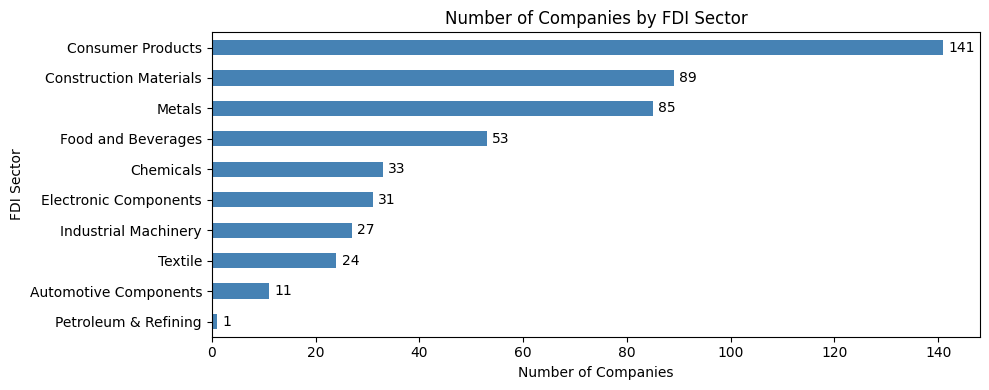

In [243]:
sector_counts = df_clean["sector_map"].value_counts().sort_values()

ax = sector_counts.plot(kind="barh", figsize=(10, 4), color="steelblue")
plt.title("Number of Companies by FDI Sector")
plt.xlabel("Number of Companies")
plt.ylabel("FDI Sector")

for bar in ax.patches:
    count = int(bar.get_width())
    ax.text(bar.get_width() + 1,
            bar.get_y() + bar.get_height() / 2,
            str(count),
            va='center')

plt.tight_layout()
plt.show()


In [244]:
def company_size(n):
    if n <= 9:
        return "1–9"
    elif n <= 49:
        return "10–49"
    elif n <= 249:
        return "50–249"
    else:
        return "250+"


In [245]:
df_clean["company_size_group"] = df_clean["num_employees"].apply(company_size)

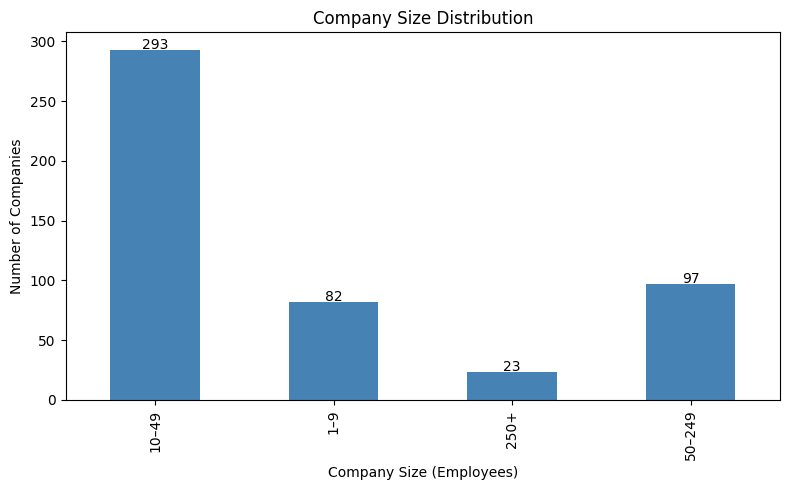

In [246]:
size_distribution = df_clean["company_size_group"].value_counts().sort_index()

ax = size_distribution.plot(kind="bar", figsize=(8, 5), color="steelblue")
plt.title("Company Size Distribution")
plt.xlabel("Company Size (Employees)")
plt.ylabel("Number of Companies")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height + 1,
            str(int(height)),
            ha='center')

plt.tight_layout()
plt.show()


### Identification of Top vs Other companies based on their normalized performance scores

#### Handling outliers


* It is visible from data descriptive statistics that there is big outliers(std deviation) within the dataset so it is important to identify companies in a way that reduces skewness of data and allows normal distribution to reduce outlier's effect on results. That's why there is 2 ranks created:
1. turnover_rank - high rank low performance
2. employees_rank - high rank - small sized companies.

After creating ranks identification of what matters more to identify company performance. There could be small or medium sized companies but high tunover so to make sure annual turnover gets more weight in the performance score weighted performance ranks created.

In [247]:
if 'annual_turnover' in df_clean.columns and 'num_employees' in df_clean.columns:
    print("Calculating performance score based on weighted ranks...")
    df_clean['turnover_rank'] = df_clean['annual_turnover'].rank(method='dense', ascending=False)
    df_clean['employees_rank'] = df_clean['num_employees'].rank(method='dense', ascending=False)

    # Weighted Average for performance score
    weight_turnover = 0.6
    weight_employees = 0.4

    # The weighted performance score
    df_clean['performance_score_weighted_rank'] = (
        (df_clean['turnover_rank'] * weight_turnover) +
        (df_clean['employees_rank'] * weight_employees)
    )

    # Reversing the weighted rank so higher score is better performance
    # The maximum possible weighted rank score + 1 means a 'perfect' score (rank 1)
    max_weighted_rank_score = df_clean['performance_score_weighted_rank'].max()
    df_clean['performance_score_raw'] = max_weighted_rank_score - df_clean['performance_score_weighted_rank'] + 1


    print("Rescaling performance score to 1-5 range...")
    scaler_1_to_5 = MinMaxScaler(feature_range=(1, 5))
    df_clean['performance_score'] = scaler_1_to_5.fit_transform(
        df_clean[['performance_score_raw']]
    )
    threshold_1_5 = df_clean["performance_score"].quantile(0.75)

    df_clean["performance_class"] = df_clean["performance_score"].apply(
        lambda x: "Top Performing" if x >= threshold_1_5 else "Other"
    )

    print("Performance score scaled to 1-5 and classification updated.")
    print("\nFirst 5 rows with new score and class:")
    print(df_clean[['performance_score_raw', 'performance_score', 'performance_class']].head())
    print(f"\nThreshold for Top Performing (1-5 scale): {threshold_1_5:.2f}")
    print("\nValue counts for new performance class:")
    print(df_clean['performance_class'].value_counts())

else:
    print("Skipping performance score calculation and scaling: 'annual_turnover' or 'num_employees' columns not found.")

Calculating performance score based on weighted ranks...
Rescaling performance score to 1-5 range...
Performance score scaled to 1-5 and classification updated.

First 5 rows with new score and class:
   performance_score_raw  performance_score performance_class
0                  151.6           2.778040             Other
2                  135.4           2.586777             Other
3                  262.8           4.090909    Top Performing
4                  230.2           3.706021             Other
5                  137.6           2.612751             Other

Threshold for Top Performing (1-5 scale): 3.72

Value counts for new performance class:
performance_class
Other             371
Top Performing    124
Name: count, dtype: int64


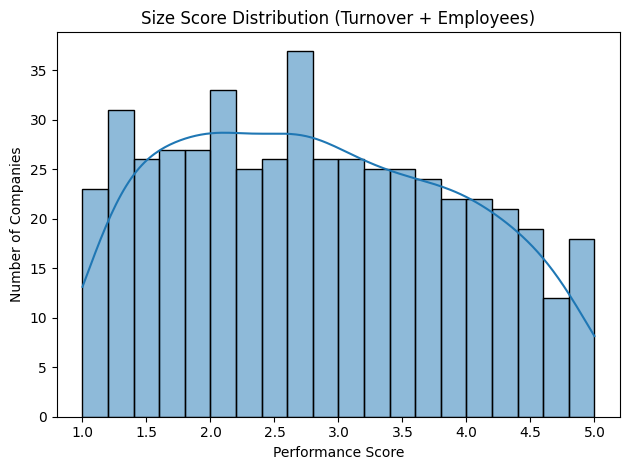

In [248]:
import seaborn as sns
sns.histplot(df_clean["performance_score"], bins=20, kde=True)
plt.title("Size Score Distribution (Turnover + Employees)")
plt.xlabel("Performance Score")
plt.ylabel("Number of Companies")
plt.tight_layout()
plt.show()


In [249]:
df_clean

,sector,annual_turnover,return_on_sales,exports_percent,num_employees,gross_profit,net_profit,ERP production_planning_software,order_tracking_software,MES integrated_operations_software,...,system_integration_with_suppliers,sector_name,sector_map,company_size_group,turnover_rank,employees_rank,performance_score_weighted_rank,performance_score_raw,performance_score,performance_class
0,32.0,1073924.0,3.0,3.0,16.0,36551.0,30752.0,2.0,4.0,4.0,...,3.0,Other production,Consumer Products,10–49,234.0,122.0,189.2,151.6,2.778040,Other
2,32.0,900000.0,5.0,4.0,13.0,NaN,NaN,1.0,1.0,1.0,...,-1.0,Other production,Consumer Products,10–49,259.0,125.0,205.4,135.4,2.586777,Other
3,32.0,6500000.0,4.0,4.0,72.0,NaN,NaN,5.0,4.0,5.0,...,-1.0,Other production,Consumer Products,50–249,84.0,69.0,78.0,262.8,4.090909,Top Performing
4,32.0,3839360.0,5.0,2.0,46.0,327308.0,273056.0,1.0,5.0,5.0,...,1.0,Other production,Consumer Products,10–49,123.0,92.0,110.6,230.2,3.706021,Other
5,32.0,752837.0,4.0,3.0,44.0,NaN,NaN,2.0,4.0,3.0,...,2.0,Other production,Consumer Products,10–49,276.0,94.0,203.2,137.6,2.612751,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,11.0,1000000.0,1.0,1.0,7.0,NaN,NaN,2.0,4.0,2.0,...,3.0,Beverage production,Food and Beverages,1–9,244.0,131.0,198.8,142.0,2.664699,Other
502,16.0,815110.0,NaN,3.0,31.0,2215.0,2115.0,-1.0,-1.0,-1.0,...,2.0,Manufacture of wood and of products of wood an...,Construction Materials,10–49,268.0,107.0,203.6,137.2,2.608028,Other
503,13.0,2192224.0,2.0,3.0,61.0,148542.0,148542.0,2.0,2.0,2.0,...,3.0,Production of textile products,Textile,50–249,162.0,79.0,128.8,212.0,3.491145,Other
504,16.0,10964752.0,2.0,4.0,216.0,-190611.0,-190611.0,4.0,4.0,4.0,...,3.0,Manufacture of wood and of products of wood an...,Construction Materials,50–249,50.0,26.0,40.4,300.4,4.534829,Top Performing


<ipython-input-250-d3bd757ef61d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_clean, x="performance_class", palette="viridis")


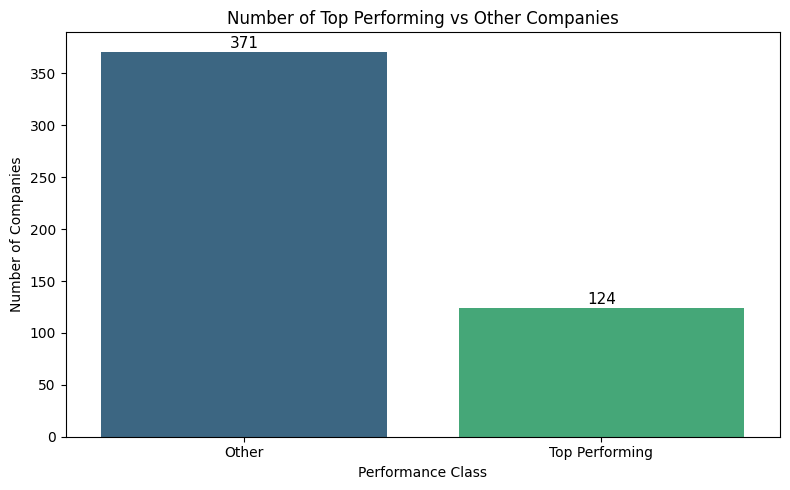

In [250]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_clean, x="performance_class", palette="viridis")

for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 1,
            str(count),
            ha='center', va='bottom', fontsize=11)

plt.title("Number of Top Performing vs Other Companies")
plt.xlabel("Performance Class")
plt.ylabel("Number of Companies")
plt.tight_layout()
plt.show()

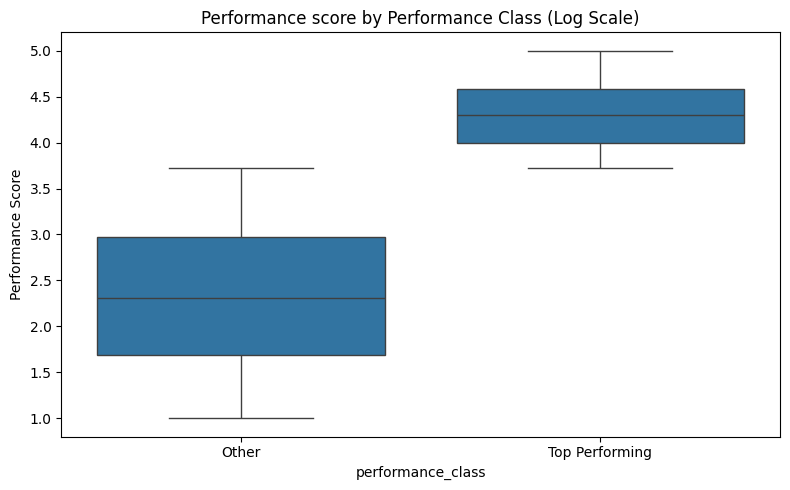

In [251]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="performance_class", y="performance_score")
plt.title("Performance score by Performance Class (Log Scale)")
plt.ylabel("Performance Score")
plt.tight_layout()
plt.show()


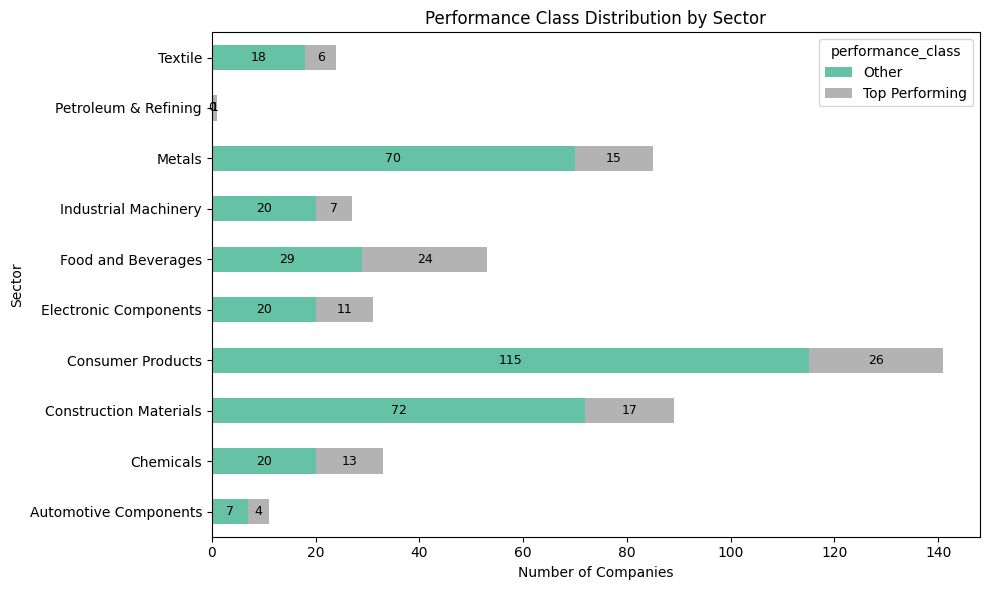

In [252]:
crosstab = pd.crosstab(df_clean["sector_map"], df_clean["performance_class"])

ax = crosstab.plot(
    kind="barh",
    stacked=True,
    figsize=(10, 6),
    colormap="Set2"
)

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=9, color='black')

plt.title("Performance Class Distribution by Sector")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


### Functional Domains with new copied dataset digital_df

In [253]:
digital_functions = {
    "Production Planning and Control": [
        "ERP production_planning_software",      # Q018.1
        "order_tracking_software",               # Q018.2
        "MES integrated_operations_software"     # Q018.3
    ],
    "Automation and Robotics": [
        "industrial_robots_usage",               # Q019.1
        "collaborative_robots_usage",            # Q019.2
        "process_automation",                    # Q019.3
        "automated_production_lines",            # Q027.1
        "autonomous_production_control",         # Q027.2
        "autonomous_data_analysis"               # Q027.3
    ],
    "Design and Prototyping": [
        "cad_software_usage",                    # Q020.1
        "cnc_equipment_usage",                   # Q020.2
        "3d_printing_prototyping"                # Q020.3
    ],
    "Human-Machine Interaction (HMI)": [
        "shopfloor_tablet_use",                  # Q021.1
        "interactive_production_instructions",   # Q021.2
        "paperless_production",                  # Q021.3
        "ar_asset_identification",               # Q026.1
        "ar_training",                           # Q026.2
        "ar_maintenance_management"              # Q026.3
    ],
    "Data Management and Analytics": [
        "inventory_tracking_raw_materials",      # Q022.1
        "automatic_ordering_solutions",          # Q022.2
        "inventory_tracking_finished_goods",     # Q022.3
        "work_center_data_collection",           # Q023.1
        "wip_tracking_rfid_barcode",             # Q023.2
        "downtime_data_collection",              # Q023.3
        "ai_quality_control",                    # Q024.1
        "ai_demand_forecasting",                 # Q024.2
        "ai_predictive_maintenance",             # Q024.3
        "simulation_root_cause_analysis",        # Q025.1
        "process_mining",                        # Q025.2
        "simulation_schedule_prediction"         # Q025.3
    ],
    "Supply Chain Integration": [
        "info_sharing_with_suppliers",           # Q028.1
        "collaborative_planning_with_suppliers", # Q028.2
        "system_integration_with_suppliers"      # Q028.3
    ]
}

* Created a dictionary of technologies per functional domain they are used.

In [280]:
adjusted_domain_scores = {}

for domain, cols in digital_functions.items():
    # since -1 means 'Not Applicable' can be replaced with NaN to avoid in analysis
    valid_data = df_clean[cols].replace(-1, pd.NA)

    # Number of questions each company answered in that domain
    response_count = valid_data.notna().sum(axis=1)

    # Average score for each company in that domain
    domain_avg = valid_data.mean(axis=1, skipna=True)

    # Penalizing scores based on how many questions were answered
    adjusted_score = domain_avg * (response_count / len(cols))
    df_clean[f"{domain}_adjusted_score"] = adjusted_score
    adjusted_domain_scores[domain] = round(adjusted_score.mean(skipna=True), 2)

adjusted_domain_avg_df = pd.DataFrame.from_dict(
    adjusted_domain_scores, orient="index", columns=["Adjusted Average Score"]
).sort_values(by="Adjusted Average Score", ascending=False)

adjusted_domain_avg_df


,Adjusted Average Score
Production Planning and Control,2.90
Design and Prototyping,2.56
Supply Chain Integration,2.25
Automation and Robotics,2.05
Human-Machine Interaction (HMI),1.98
Data Management and Analytics,1.94


In [302]:
function_score_cols = [f"{domain}_adjusted_score" for domain in digital_functions]

df_melted = pd.melt(
    df_clean,
    id_vars=["performance_class"],  # this stays as identifier
    value_vars=function_score_cols,  # the domain score columns
    var_name="Function",            # name for the melted column headers
    value_name="Score"              # name for the score values
)

df_melted["Function"] = df_melted["Function"].str.replace("_adjusted_score", "", regex=False)


In [282]:
df_melted

,performance_class,Function,Score
0,Other,Production Planning and Control,3.333333
1,Other,Production Planning and Control,1.0
2,Top Performing,Production Planning and Control,4.666667
3,Other,Production Planning and Control,3.666667
4,Other,Production Planning and Control,3.0
...,...,...,...
2965,Other,Supply Chain Integration,2.0
2966,Other,Supply Chain Integration,2.666667
2967,Other,Supply Chain Integration,3.333333
2968,Top Performing,Supply Chain Integration,3.333333


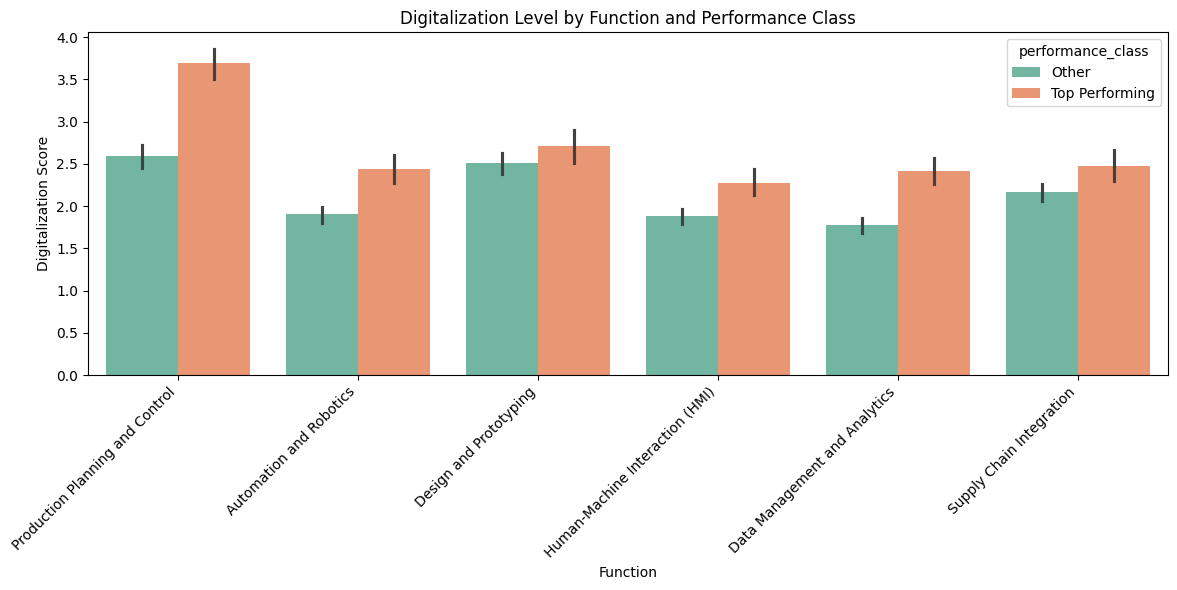

In [283]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted,
    x="Function",
    y="Score",
    hue="performance_class",
    palette="Set2"
)
plt.title("Digitalization Level by Function and Performance Class")
plt.ylabel("Digitalization Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [284]:
digitalization_by_class = df_clean.groupby("performance_class")[function_score_cols].mean().T.round(2)
digitalization_by_class

performance_class,Other,Top Performing
Production Planning and Control_adjusted_score,2.589831,3.690058
Automation and Robotics_adjusted_score,1.901274,2.438375
Design and Prototyping_adjusted_score,2.506098,2.70679
Human-Machine Interaction (HMI)_adjusted_score,1.876812,2.276423
Data Management and Analytics_adjusted_score,1.77119,2.417344
Supply Chain Integration_adjusted_score,2.160656,2.479167


<ipython-input-301-77b6e14f9fa1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Function", y="Score", palette="coolwarm")


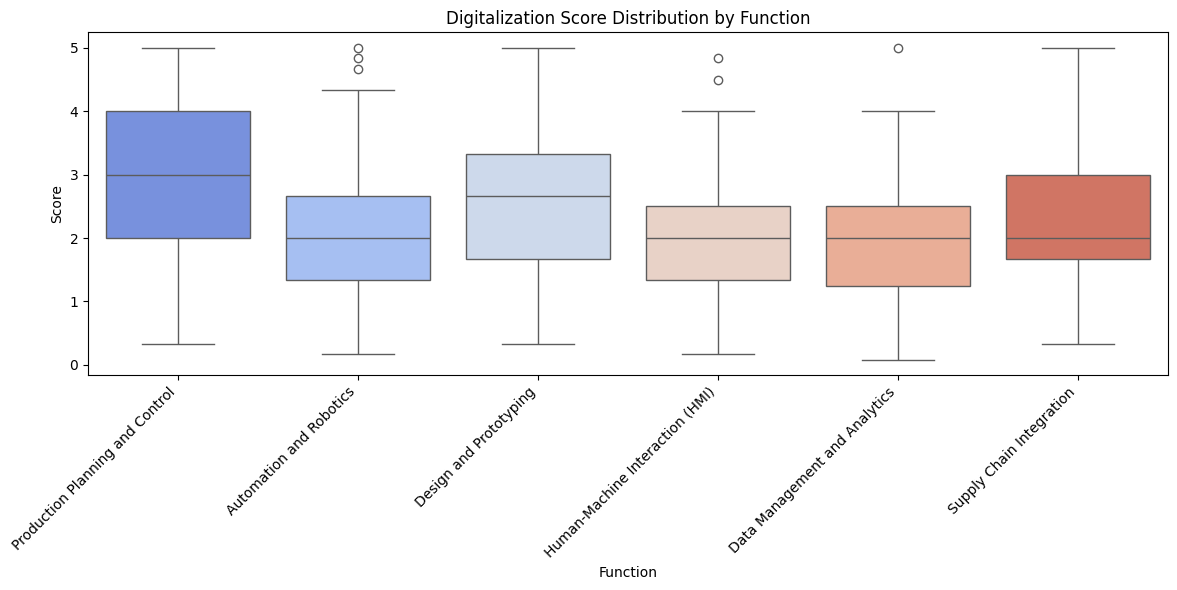

In [301]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Function", y="Score", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Digitalization Score Distribution by Function")
plt.tight_layout()
plt.show()


“The analysis shows that while production planning tools are widely adopted, advanced functions such as automation, data analytics, and supply chain integration are still in early stages for many firms. This uneven distribution of digital maturity highlights strategic opportunities for targeted investment in high-impact areas.”


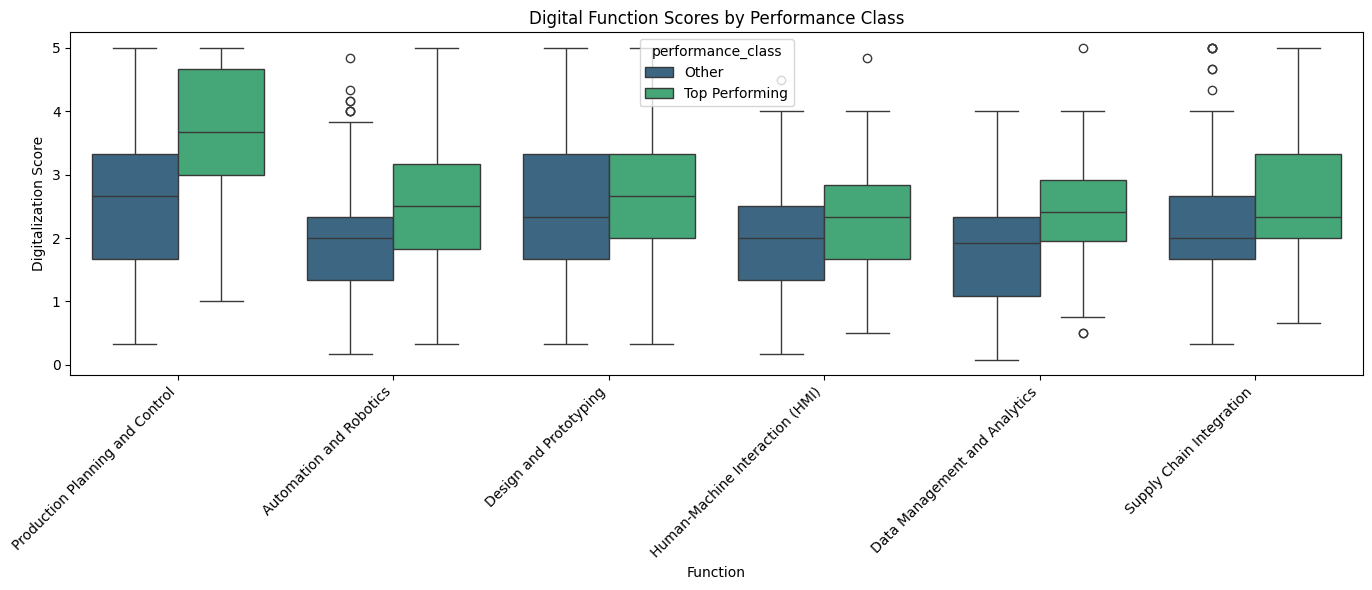

In [259]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_melted, x="Function", y="Score", hue="performance_class", palette="viridis")
plt.title("Digital Function Scores by Performance Class")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Digitalization Score")
plt.tight_layout()
plt.show()


“The analysis reveals that top-performing companies consistently outperform their peers in core digital functions, particularly in Production Planning, Data & Analytics, and Supply Chain Integration. However, some functions like Design show equal adoption across performance classes, suggesting that not all digital investments correlate equally with competitive advantage.”



In [260]:
digital_df = df_clean.copy()

 #### How much of each function is being utilized on average by each group?”




Top-performing companies are more digitally balanced and focus more heavily on core operational efficiency and data-driven tools — while others concentrate more on front-end design tech, which may not drive competitiveness as directly.

In [287]:
corr_columns = function_score_cols + ["performance_score"]

correlation_matrix = digital_df[corr_columns].corr(method='spearman')  # or method='pearson'

function_correlations = correlation_matrix["performance_score"].drop("performance_score").sort_values(ascending=False)

function_correlations


,performance_score
Production Planning and Control_adjusted_score,0.421442
Data Management and Analytics_adjusted_score,0.330073
Automation and Robotics_adjusted_score,0.293272
Human-Machine Interaction (HMI)_adjusted_score,0.225520
Supply Chain Integration_adjusted_score,0.187253
Design and Prototyping_adjusted_score,0.090885


“The strongest correlations with performance were observed in Production Planning (ρ = 0.42) and Data Analytics (ρ = 0.33), suggesting that internal process optimization and data-driven decision-making are key enablers of competitiveness. In contrast, technologies related to design and prototyping showed minimal correlation with performance, implying they may not directly contribute to business success when adopted in isolation.”




<ipython-input-289-3cde53b33cd3>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


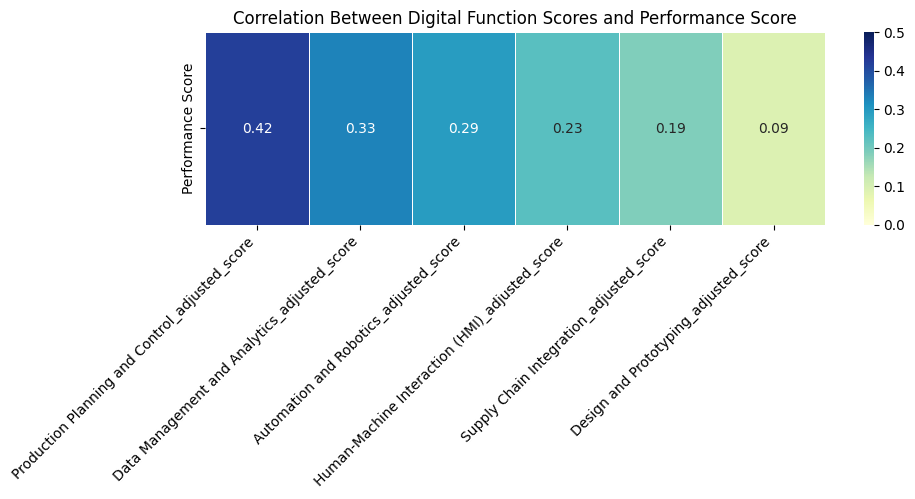

In [289]:
corr_df = function_correlations.to_frame().T
corr_df.index = ["Performance Score"]

plt.figure(figsize=(10, 2.5))
sns.heatmap(corr_df, annot=True, cmap="YlGnBu", vmin=0, vmax=0.5, linewidths=0.5, fmt=".2f")
plt.title("Correlation Between Digital Function Scores and Performance Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


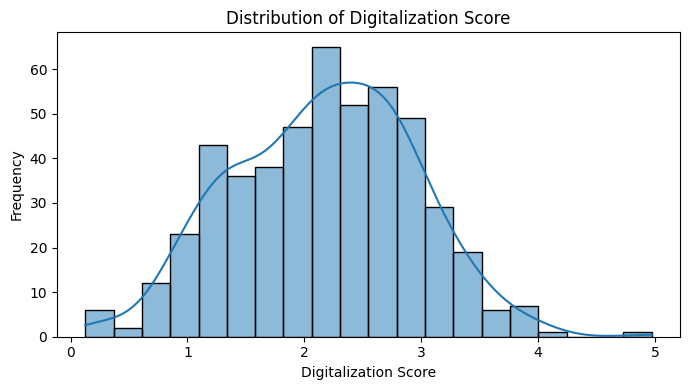

In [264]:
digital_df["digitalization_score"] = digital_df[function_score_cols].mean(axis=1)


plt.figure(figsize=(7, 4))
sns.histplot(digital_df['digitalization_score'], kde=True, bins=20)
plt.title("Distribution of Digitalization Score")
plt.xlabel("Digitalization Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### Kolmogorov-Smirnov Ktests - Normality check

In [294]:
clean_scores = digital_df["digitalization_score"].dropna()
clean_scores_np = clean_scores.values.astype(np.float64)
mean = clean_scores_np.mean()
std = clean_scores_np.std()

# K-S test using the numpy array
stat, p = kstest(clean_scores_np, 'norm', args=(mean, std))
print(f"K-S p-value: {p:.4f}")

K-S p-value: 0.3346


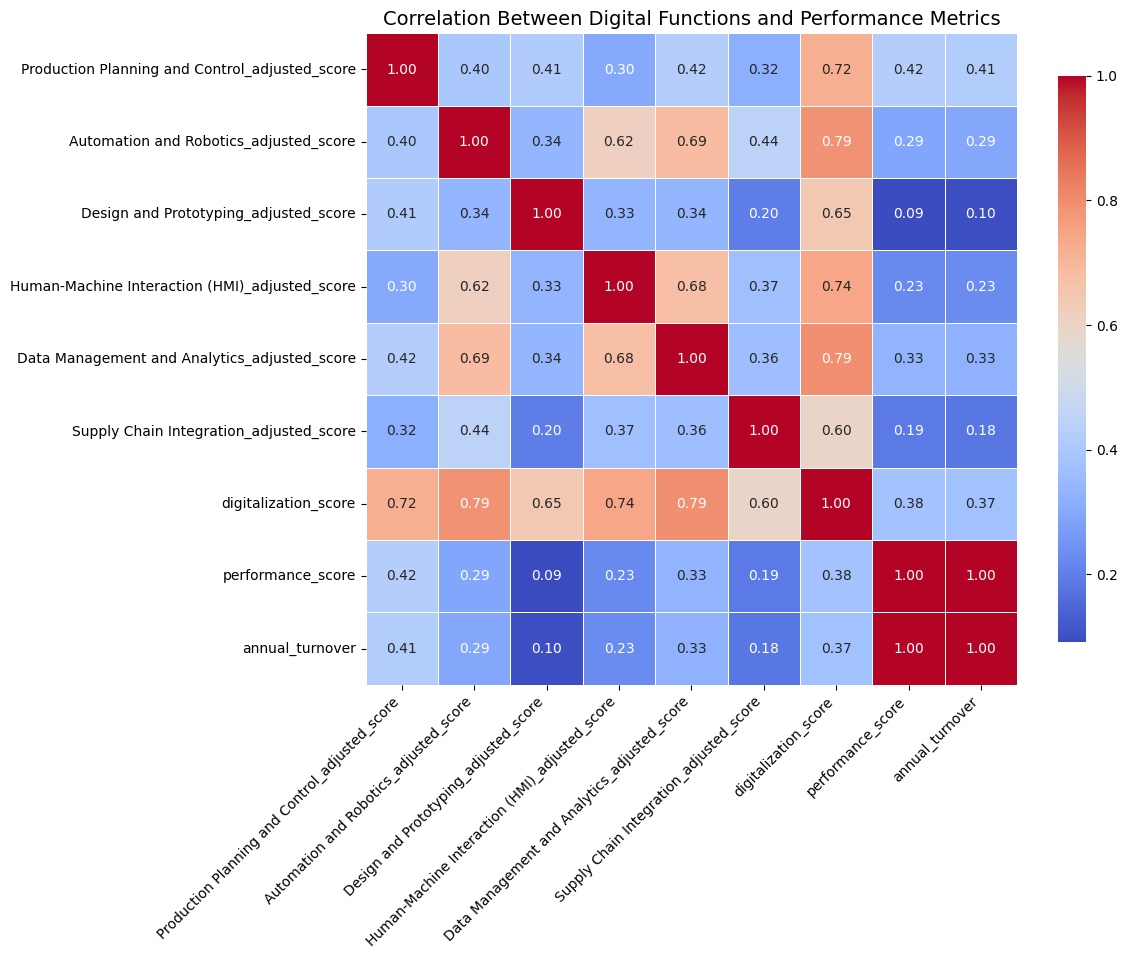

In [293]:
all_corr_cols = function_score_cols + ["digitalization_score", "performance_score", "annual_turnover"]
corr_matrix = digital_df[all_corr_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Between Digital Functions and Performance Metrics", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-295-283667727ee9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=digital_df, x="company_size_group", y="digitalization_score", palette="Spectral")


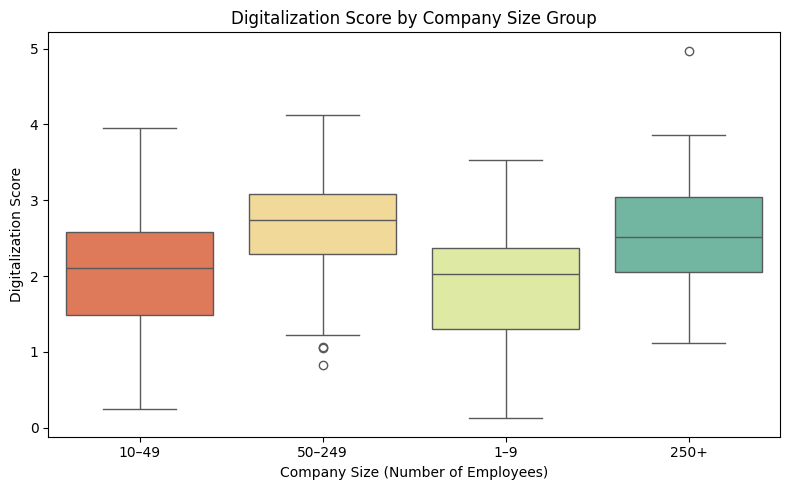

In [295]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=digital_df, x="company_size_group", y="digitalization_score", palette="Spectral")
plt.title("Digitalization Score by Company Size Group")
plt.xlabel("Company Size (Number of Employees)")
plt.ylabel("Digitalization Score")
plt.tight_layout()
plt.show()


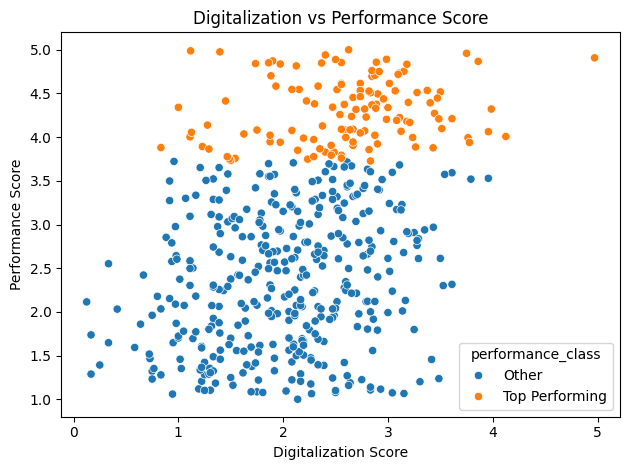

In [268]:
sns.scatterplot(data=digital_df, x="digitalization_score", y="performance_score", hue="performance_class")
plt.title("Digitalization vs Performance Score")
plt.xlabel("Digitalization Score")
plt.ylabel("Performance Score")
plt.tight_layout()
plt.show()


In [269]:
!pip install pingouin

In [270]:
from pingouin import cronbach_alpha
for func, cols in digital_functions.items():
    alpha, _ = cronbach_alpha(data=digital_df[cols])
    print(f"{func} → Cronbach’s alpha: {round(alpha, 3)}")


Production Planning and Control → Cronbach’s alpha: 0.871
Automation and Robotics → Cronbach’s alpha: 0.843
Design and Prototyping → Cronbach’s alpha: 0.652
Human-Machine Interaction (HMI) → Cronbach’s alpha: 0.808
Data Management and Analytics → Cronbach’s alpha: 0.911
Supply Chain Integration → Cronbach’s alpha: 0.792


“Cronbach’s alpha was calculated to evaluate the internal consistency of the grouped digitalization functions. Most functional groups demonstrated acceptable to good internal consistency (α ≥ 0.7), supporting the validity of the groupings as reflective of unified digital capabilities. However, the Design and Prototyping group showed a lower alpha (α = 0.61), suggesting that these tools may reflect diverse use cases or are not always adopted as a package.”



In [271]:
for func, cols in digital_functions.items():
    valid_count = digital_df[cols].dropna().shape[0]
    total_count = digital_df.shape[0]
    percent = (valid_count / total_count) * 100
    print(f"{func} → Valid Cases: {valid_count} ({percent:.1f}%)")


Production Planning and Control → Valid Cases: 495 (100.0%)
Automation and Robotics → Valid Cases: 495 (100.0%)
Design and Prototyping → Valid Cases: 495 (100.0%)
Human-Machine Interaction (HMI) → Valid Cases: 495 (100.0%)
Data Management and Analytics → Valid Cases: 495 (100.0%)
Supply Chain Integration → Valid Cases: 495 (100.0%)


“An independent samples t-test was conducted to compare the mean digitalization scores between top-performing companies and others. The results revealed a statistically significant difference (t = 7.816, p < 0.001), indicating that top-performing companies are significantly more digitalized than their counterparts. This supports the hypothesis that digital maturity is associated with higher business performance.”



In [296]:
from scipy.stats import ttest_ind

ttest_results = {}

for func in digital_functions.keys():
    col = f"{func}_adjusted_score"

    top = digital_df[digital_df["performance_class"] == "Top Performing"][col]
    other = digital_df[digital_df["performance_class"] == "Other"][col]

    top = pd.to_numeric(top, errors='coerce').dropna()
    other = pd.to_numeric(other, errors='coerce').dropna()

    n_top = len(top)
    n_other = len(other)

    if n_top >= 2 and n_other >= 2:
        t_stat, p_val = ttest_ind(top, other, equal_var=False)
        ttest_results[func] = {
            "t-stat": round(t_stat, 3),
            "p-value": round(p_val, 4),
            "n_top": n_top,
            "n_other": n_other
        }
    else:
        ttest_results[func] = {
            "t-stat": np.nan,
            "p-value": np.nan,
            "n_top": n_top,
            "n_other": n_other
        }

ttest_df = pd.DataFrame(ttest_results).T.sort_values("t-stat", ascending=False)
ttest_df


,t-stat,p-value,n_top,n_other
Production Planning and Control,8.977,0.0000,114.0,295.0
Data Management and Analytics,7.139,0.0000,123.0,350.0
Automation and Robotics,5.361,0.0000,119.0,314.0
Human-Machine Interaction (HMI),4.508,0.0000,123.0,345.0
Supply Chain Integration,2.986,0.0032,112.0,305.0
Design and Prototyping,1.643,0.1020,108.0,328.0


“Independent t-tests revealed statistically significant differences in digitalization levels between top-performing companies and others across nearly all functional areas. The strongest differences were observed in Data Management and Analytics (t = 8.83) and Production Planning and Control (t = 8.71), highlighting the critical role of data-driven operations and planning systems in achieving high business performance. Conversely, the difference in Design and Prototyping tools was not statistically significant (p = 0.25), suggesting that such tools are more uniformly adopted across companies regardless of performance.”



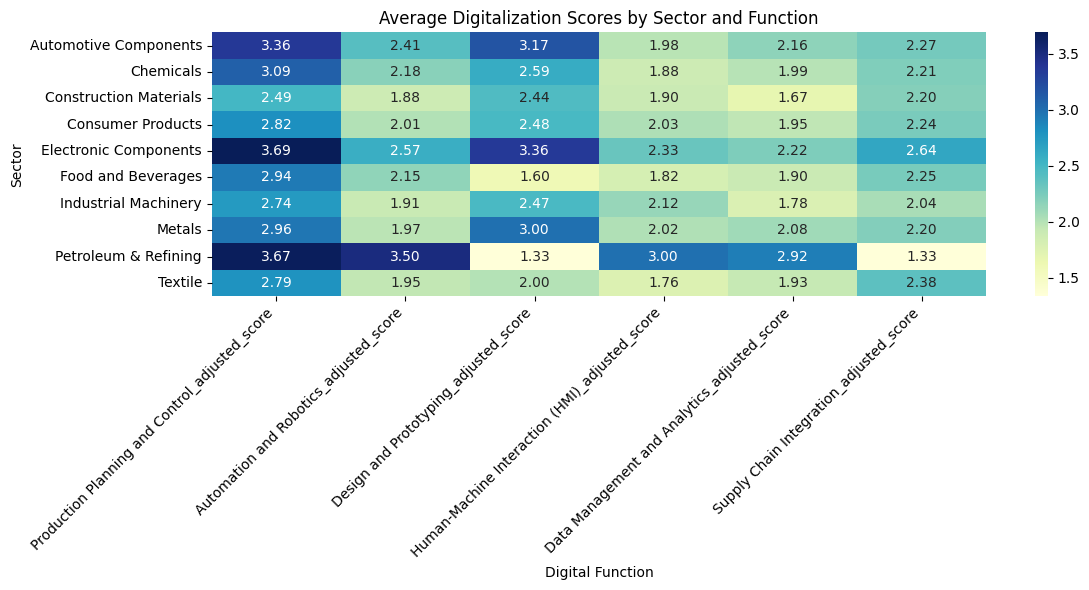

In [300]:
digital_scores_by_sector = digital_df.groupby("sector_map")[function_score_cols].mean().reset_index()

for col in function_score_cols:
    digital_scores_by_sector[col] = pd.to_numeric(digital_scores_by_sector[col], errors='coerce')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(digital_scores_by_sector.set_index("sector_map"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Digitalization Scores by Sector and Function")
plt.ylabel("Sector")
plt.xlabel("Digital Function")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [299]:
digital_df['performance_score'] = pd.to_numeric(digital_df['performance_score'], errors='coerce')
digital_df['annual_turnover'] = pd.to_numeric(digital_df['annual_turnover'], errors='coerce')


In [298]:
sector_corr_df = pd.DataFrame()

for sector in digital_df['sector_map'].unique():
    sector_df = digital_df[digital_df['sector_map'] == sector]
    correlations = sector_df[function_score_cols + ['performance_score']].corr()['performance_score'][:-1]
    sector_corr_df[sector] = correlations

sector_corr_df = sector_corr_df.T


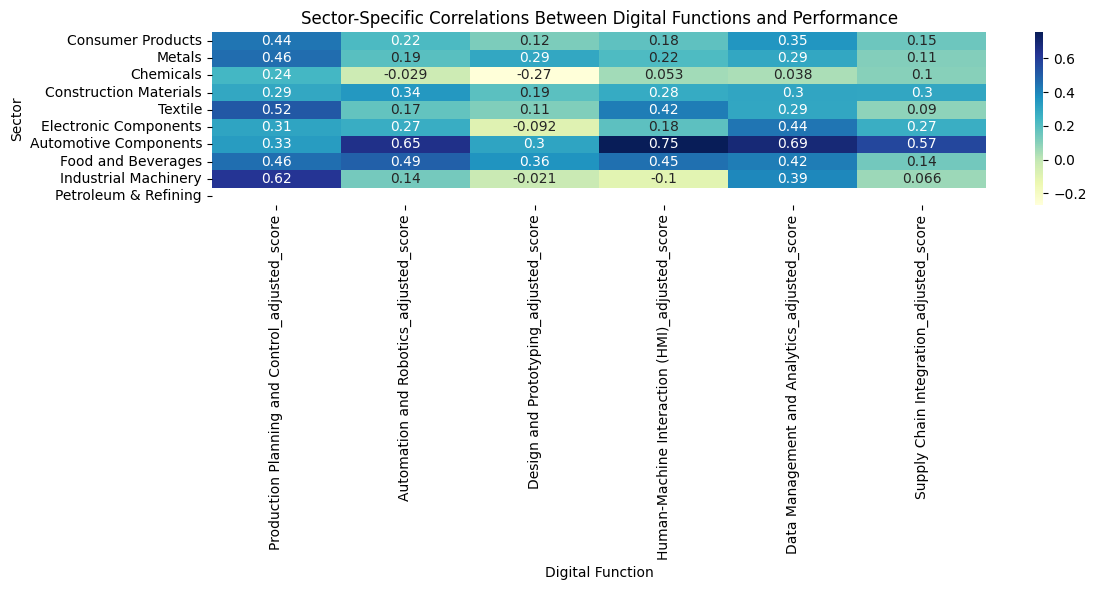

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(sector_corr_df, annot=True, cmap='YlGnBu')
plt.title("Sector-Specific Correlations Between Digital Functions and Performance")
plt.ylabel("Sector")
plt.xlabel("Digital Function")
plt.tight_layout()
plt.show()
